In [1]:


pip install numpy opencv-python scikit-learn

In [2]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


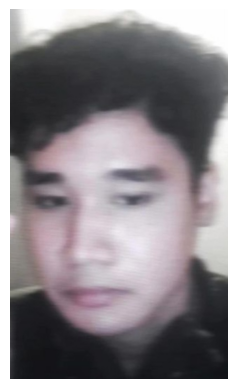

In [9]:
# Path to your image file in Google Drive
image_path = '/content/drive/My Drive/Images/Miguel/1.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [34]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images')

In [35]:

images.shape


(30, 10000)

In [36]:
labels.shape

(30,)

In [37]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [ ]:

from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)